In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/Kaggle 팀 과제/집 가격 예측(회귀)'
path = '/content/gdrive/MyDrive/Kaggle 팀 과제/집 가격 예측(회귀)'
!ls

/content/gdrive/.shortcut-targets-by-id/1EoJgFet78Cqka5-cEF0_OIL7aL7xQ5KB/Kaggle 팀 과제/집 가격 예측(회귀)
'220729 초안 0.1.ipynb'			  PER_FLOOR.csv
'220730 nearest_sch_ranking_정리.ipynb'   polynomial2.csv
'220730 nearest_sch_ranking.ipynb'	  polynomial3.csv
 주영2.csv				  polynomial4.csv
 CATBOOST2.csv				  polynomial5.csv
 CATBOOST3.csv				  polynomial.csv
 CATBOOST.csv				  POSTCODE.csv
 catboost_info				  PRESOLD.csv
 Category.csv				  rank2.csv
 주영.csv				  rank.csv
 DATE_SOLD2.csv				  rank+garage2.csv
 DATE_SOLD3.csv				  rank+garage.csv
 DATE_SOLD4.csv				  regression220718.zip
 DATE_SOLD.csv				  remove_NEAREST_SCH_DIST.csv
 garage2.csv				  sample_submission.csv
 garage.csv				  SCH_RANK_LABEL_ENCODER2.csv
 garage_outlier.csv			  SCH_RANK_LABEL_ENCODER3.csv
 gpu_test2.csv				  SCH_RANK_LABEL_ENCODER4.csv
 gpu_test3.csv				  SCH_RANK_LABEL_ENCODER.csv
 gpu_test4.csv				  square_triple2.csv
 gpu_test.csv				  square_triple.csv
 gridsearch_with_best_score.csv		  submiss

In [3]:
!unzip -o -qq regression220718.zip

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [46]:
train_df.describe()

count     18510
unique        2
top       False
freq      18190
Name: PRESOLD, dtype: object

In [7]:
test_df.describe()

ID      BEDROOMS     BATHROOMS        GARAGE      LAND_AREA  \
count  15146.000000  15146.000000  15146.000000  14035.000000   15146.000000   
mean   26082.500000      3.657005      1.820085      2.200071    2631.965932   
std     4372.417924      0.750092      0.599148      1.281082   12502.508734   
min    18510.000000      1.000000      1.000000      1.000000      71.000000   
25%    22296.250000      3.000000      1.000000      2.000000     506.000000   
50%    26082.500000      4.000000      2.000000      2.000000     683.000000   
75%    29868.750000      4.000000      2.000000      2.000000     840.000000   
max    33655.000000      9.000000     16.000000     50.000000  455212.000000   

         FLOOR_AREA    BUILD_YEAR      CBD_DIST  NEAREST_STN_DIST  \
count  15146.000000  13719.000000  15146.000000      15146.000000   
mean     183.499604   1989.585465  19672.671861       4502.303579   
std       71.956342     20.916498  11378.218527       4445.988999   
min        1.000000   1870.000000    693.000000         46.000000   
25%      130.000000   1978.000000  11000.000000       1800.000000   
50%      173.000000   1995.000000  17300.000000       3200.000000   
75%      223.000000   2005.000000  26600.000000       5300.000000   
max      840.000000   2017.000000  58700.000000      34300.000000   

           POSTCODE      LATITUDE     LONGITUDE  NEAREST_SCH_DIST  \
count  15146.000000  15146.000000  15146.000000      15146.000000   
mean    6089.188036    -31.960525    115.879532          1.806130   
std       62.315689      0.176970      0.118044          1.706987   
min     6003.000000    -32.455550    115.582730          0.082859   
25%     6050.000000    -32.066644    115.790371          0.883228   
50%     6069.000000    -31.932300    115.854480          1.339595   
75%     6149.000000    -31.844574    115.970039          2.100188   
max     6558.000000    -31.457450    116.343201         19.142508   

       NEAREST_SCH_RANK  
count      10194.000000  
mean          72.654797  
std           40.765334  
min            1.000000  
25%           39.000000  
50%           68.000000  
75%          105.000000  
max          139.000000

In [8]:
sample_submission = pd.read_csv('sample_submission.csv')

In [9]:
test_id_idx = sample_submission['ID']

In [10]:
test_id_idx

0        18510
1        18511
2        18512
3        18513
4        18514
         ...  
15141    33651
15142    33652
15143    33653
15144    33654
15145    33655
Name: ID, Length: 15146, dtype: int64

In [11]:
len_train_df = len(train_df)
len_test_df = len(test_df)

In [12]:
df = pd.concat([train_df, test_df])

In [13]:
df

ID                   ADDRESS           SUBURB      PRICE  BEDROOMS  \
0          0             9 Crumlin Way        Ridgewood   520000.0         5   
1          1  37 Sissinghurst Crescent        Landsdale   575000.0         5   
2          2             24 Tees Court         Mindarie   760000.0         4   
3          3        31 Brentham Street   Mount Hawthorn  1230000.0         2   
4          4      46/1 Corkhill Street  North Fremantle  2010000.0         3   
...      ...                       ...              ...        ...       ...   
15141  33651          2 Danehill Place            Balga        NaN         3   
15142  33652          19 Hester Street         Langford        NaN         4   
15143  33653            43 Hale Street    Watermans Bay        NaN         3   
15144  33654        980 Bushlands Road            Hovea        NaN         5   
15145  33655            9/3 Marsh Road     Mount Richon        NaN         3   

       BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0              2     4.0        674         266      2007.0     35500   
1              4     2.0        540         301      2014.0     16900   
2              2     2.0        781         220      1992.0     33500   
3              1     2.0        425         185      1938.0      3500   
4              2     2.0        546         186      2004.0     12900   
...          ...     ...        ...         ...         ...       ...   
15141          1     NaN        801         108      1996.0     10800   
15142          2     2.0        530         158      1998.0     13100   
15143          2     2.0       1072         148      1950.0     14700   
15144          3     2.0      19996         396      1990.0     24900   
15145          1     1.0       5823         109      1990.0     27400   

                   NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0               Butler Station              3000  09-2015\r      6030   
1            Whitfords Station              8100  07-2018\r      6065   
2             Clarkson Station              3500  02-2020\r      6030   
3          Leederville Station              1500  07-2020\r      6016   
4      North Fremantle Station               800  10-2017\r      6159   
...                        ...               ...        ...       ...   
15141          Warwick Station              3900  04-2018\r      6061   
15142         Thornlie Station               854  11-2018\r      6147   
15143          Warwick Station              3800  02-2015\r      6020   
15144          Midland Station             10200  09-2012\r      6071   
15145         Armadale Station               688  03-2013\r      6112   

        LATITUDE   LONGITUDE                       NEAREST_SCH  \
0     -31.656206  115.720566  IRENE MCCORMACK CATHOLIC COLLEGE   
1     -31.800802  115.867675        LANDSDALE CHRISTIAN SCHOOL   
2     -31.682040  115.702600           MINDARIE SENIOR COLLEGE   
3     -31.926046  115.838181         ARANMORE CATHOLIC COLLEGE   
4     -32.032079  115.759626   JOHN CURTIN COLLEGE OF THE ARTS   
...          ...         ...                               ...   
15141 -31.857800  115.834370          BALGA SENIOR HIGH SCHOOL   
15142 -32.039400  115.951670               COMMUNICARE ACADEMY   
15143 -31.852980  115.757010         CARINE SENIOR HIGH SCHOOL   
15144 -31.878930  116.107640                    HELENA COLLEGE   
15145 -32.158325  116.018269       ARMADALE SENIOR HIGH SCHOOL   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0              1.079230             120.0  
1              0.667585               NaN  
2              0.650761             111.0  
3              0.484465             106.0  
4              1.869050              25.0  
...                 ...               ...  
15141          1.352896               NaN  
15142          1.526169               NaN  
15143          1.779797              47.0  
15144          3.523922              78.0  
15145          0.5

In [16]:
df.loc[df["NEAREST_SCH"] == "INTERNATIONAL SCHOOL OF WESTERN AUSTRALIA", "NEAREST_SCH_RANK"] = float(2)
df.loc[df["NEAREST_SCH"] == "DIVINE MERCY COLLEGE", "NEAREST_SCH_RANK"] = float(117)
df.loc[df["NEAREST_SCH"] == "THE MONTESSORI SCHOOL", "NEAREST_SCH_RANK"] = float(93)
df.loc[df["NEAREST_SCH"] == "HERITAGE COLLEGE PERTH", "NEAREST_SCH_RANK"] = float(196)
df.loc[df["NEAREST_SCH"] == "ST ANDREW'S GRAMMAR", "NEAREST_SCH_RANK"] = float(132)
df.loc[df["NEAREST_SCH"] == "TREETOPS MONTESSORI SCHOOL", "NEAREST_SCH_RANK"] = float(172)
df.loc[df["NEAREST_SCH"] == "REHOBOTH CHRISTIAN COLLEGE", "NEAREST_SCH_RANK"] = float(110)
df["NEAREST_SCH_RANK"].fillna(float(150), inplace = True)

In [17]:
df

ID                   ADDRESS           SUBURB      PRICE  BEDROOMS  \
0          0             9 Crumlin Way        Ridgewood   520000.0         5   
1          1  37 Sissinghurst Crescent        Landsdale   575000.0         5   
2          2             24 Tees Court         Mindarie   760000.0         4   
3          3        31 Brentham Street   Mount Hawthorn  1230000.0         2   
4          4      46/1 Corkhill Street  North Fremantle  2010000.0         3   
...      ...                       ...              ...        ...       ...   
15141  33651          2 Danehill Place            Balga        NaN         3   
15142  33652          19 Hester Street         Langford        NaN         4   
15143  33653            43 Hale Street    Watermans Bay        NaN         3   
15144  33654        980 Bushlands Road            Hovea        NaN         5   
15145  33655            9/3 Marsh Road     Mount Richon        NaN         3   

       BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0              2     4.0        674         266      2007.0     35500   
1              4     2.0        540         301      2014.0     16900   
2              2     2.0        781         220      1992.0     33500   
3              1     2.0        425         185      1938.0      3500   
4              2     2.0        546         186      2004.0     12900   
...          ...     ...        ...         ...         ...       ...   
15141          1     NaN        801         108      1996.0     10800   
15142          2     2.0        530         158      1998.0     13100   
15143          2     2.0       1072         148      1950.0     14700   
15144          3     2.0      19996         396      1990.0     24900   
15145          1     1.0       5823         109      1990.0     27400   

                   NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0               Butler Station              3000  09-2015\r      6030   
1            Whitfords Station              8100  07-2018\r      6065   
2             Clarkson Station              3500  02-2020\r      6030   
3          Leederville Station              1500  07-2020\r      6016   
4      North Fremantle Station               800  10-2017\r      6159   
...                        ...               ...        ...       ...   
15141          Warwick Station              3900  04-2018\r      6061   
15142         Thornlie Station               854  11-2018\r      6147   
15143          Warwick Station              3800  02-2015\r      6020   
15144          Midland Station             10200  09-2012\r      6071   
15145         Armadale Station               688  03-2013\r      6112   

        LATITUDE   LONGITUDE                       NEAREST_SCH  \
0     -31.656206  115.720566  IRENE MCCORMACK CATHOLIC COLLEGE   
1     -31.800802  115.867675        LANDSDALE CHRISTIAN SCHOOL   
2     -31.682040  115.702600           MINDARIE SENIOR COLLEGE   
3     -31.926046  115.838181         ARANMORE CATHOLIC COLLEGE   
4     -32.032079  115.759626   JOHN CURTIN COLLEGE OF THE ARTS   
...          ...         ...                               ...   
15141 -31.857800  115.834370          BALGA SENIOR HIGH SCHOOL   
15142 -32.039400  115.951670               COMMUNICARE ACADEMY   
15143 -31.852980  115.757010         CARINE SENIOR HIGH SCHOOL   
15144 -31.878930  116.107640                    HELENA COLLEGE   
15145 -32.158325  116.018269       ARMADALE SENIOR HIGH SCHOOL   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0              1.079230             120.0  
1              0.667585             200.0  
2              0.650761             111.0  
3              0.484465             106.0  
4              1.869050              25.0  
...                 ...               ...  
15141          1.352896             200.0  
15142          1.526169             200.0  
15143          1.779797              47.0  
15144          3.523922              78.0  
15145          0.5

In [18]:
train_df = df[:-len_test_df]
test_df = df[-len_test_df:]

In [19]:
train_df

ID                   ADDRESS           SUBURB      PRICE  BEDROOMS  \
0          0             9 Crumlin Way        Ridgewood   520000.0         5   
1          1  37 Sissinghurst Crescent        Landsdale   575000.0         5   
2          2             24 Tees Court         Mindarie   760000.0         4   
3          3        31 Brentham Street   Mount Hawthorn  1230000.0         2   
4          4      46/1 Corkhill Street  North Fremantle  2010000.0         3   
...      ...                       ...              ...        ...       ...   
18505  18505     36 Kentucky Boulevard          Hocking   475000.0         4   
18506  18506      10 Regatta Boulevard   Champion Lakes   485000.0         3   
18507  18507     145 Coolgardie Avenue        Redcliffe   642000.0         3   
18508  18508          12 Mckenzie Road           Samson   491000.0         4   
18509  18509                2 Lea Road        Koondoola   490000.0         4   

       BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0              2     4.0        674         266      2007.0     35500   
1              4     2.0        540         301      2014.0     16900   
2              2     2.0        781         220      1992.0     33500   
3              1     2.0        425         185      1938.0      3500   
4              2     2.0        546         186      2004.0     12900   
...          ...     ...        ...         ...         ...       ...   
18505          2     2.0        533         198      2007.0     21200   
18506          2     2.0        344         237      2010.0     22100   
18507          1     1.0       1016         110      1953.0      8900   
18508          2     2.0        718         176      1988.0     14600   
18509          1     2.0       1030         109      1987.0     11600   

                   NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0               Butler Station              3000  09-2015\r      6030   
1            Whitfords Station              8100  07-2018\r      6065   
2             Clarkson Station              3500  02-2020\r      6030   
3          Leederville Station              1500  07-2020\r      6016   
4      North Fremantle Station               800  10-2017\r      6159   
...                        ...               ...        ...       ...   
18505        Edgewater Station              4400  04-2018\r      6065   
18506        Kelmscott Station              1900  06-2011\r      6111   
18507       Bassendean Station              3100  01-2018\r      6104   
18508          Murdoch Station              5400  03-2009\r      6163   
18509          Warwick Station              6400  09-2013\r      6064   

        LATITUDE   LONGITUDE                               NEAREST_SCH  \
0     -31.656206  115.720566          IRENE MCCORMACK CATHOLIC COLLEGE   
1     -31.800802  115.867675                LANDSDALE CHRISTIAN SCHOOL   
2     -31.682040  115.702600                   MINDARIE SENIOR COLLEGE   
3     -31.926046  115.838181                 ARANMORE CATHOLIC COLLEGE   
4     -32.032079  115.759626           JOHN CURTIN COLLEGE OF THE ARTS   
...          ...         ...                                       ...   
18505 -31.764187  115.824151                WANNEROO SECONDARY COLLEGE   
18506 -32.114990  115.992834  JOHN WOLLASTON ANGLICAN COMMUNITY SCHOOL   
18507 -31.931320  115.950060               CYRIL JACKSON SENIOR CAMPUS   
18508 -32.070861  115.793834                    SETON CATHOLIC COLLEGE   
18509 -31.848240  115.864000                             MERCY COLLEGE   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0              1.079230             120.0  
1              0.667585             200.0  
2              0.650761             111.0  
3              0.484465             106.0  
4              1.869050              25.0  
...                 ...               ...  
18505          1.104533             131.0  
18506          1.816768              40.0  
18507     

In [ ]:
loss_rank = set(df['NEAREST_SCH'][df['NEAREST_SCH_RANK'].isnull()])

In [ ]:
pd.DataFrame(loss_rank, columns = ['School_Name'])

Empty DataFrame
Columns: [School_Name]
Index: []

In [ ]:
pd.DataFrame

pandas.core.frame.DataFrame

In [ ]:
for col in train_df.columns:
    print(col, train_df[col].nunique(), '', sep = '\n')

ID
18510

ADDRESS
18491

SUBURB
318

PRICE
1806

BEDROOMS
10

BATHROOMS
6

GARAGE
22

LAND_AREA
3091

FLOOR_AREA
478

BUILD_YEAR
120

CBD_DIST
579

NEAREST_STN
68

NEAREST_STN_DIST
1080

DATE_SOLD
331

POSTCODE
114

LATITUDE
17203

LONGITUDE
16846

NEAREST_SCH
159

NEAREST_SCH_DIST
18397

NEAREST_SCH_RANK
103



In [ ]:
for col in test_df.columns:
    print(col, test_df[col].nunique(), '', sep = '\n')

ID
15146

ADDRESS
15124

SUBURB
317

BEDROOMS
9

BATHROOMS
8

GARAGE
20

LAND_AREA
2747

FLOOR_AREA
459

BUILD_YEAR
116

CBD_DIST
574

NEAREST_STN
68

NEAREST_STN_DIST
1007

DATE_SOLD
302

POSTCODE
113

LATITUDE
14227

LONGITUDE
13910

NEAREST_SCH
159

NEAREST_SCH_DIST
15059

NEAREST_SCH_RANK
103



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2160x720 with 0 Axes>

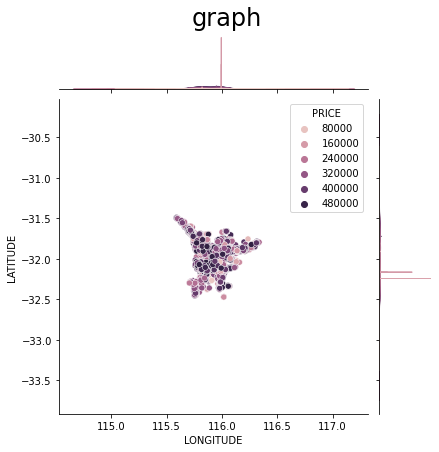

In [ ]:
plt.figure(figsize=(30,10))
sns_plot = sns.jointplot(train_df['LONGITUDE'],train_df['LATITUDE'],hue = train_df['PRICE'][train_df['PRICE'] < 500000])
plt.suptitle("graph", y=1.04, size=24)
plt.show()

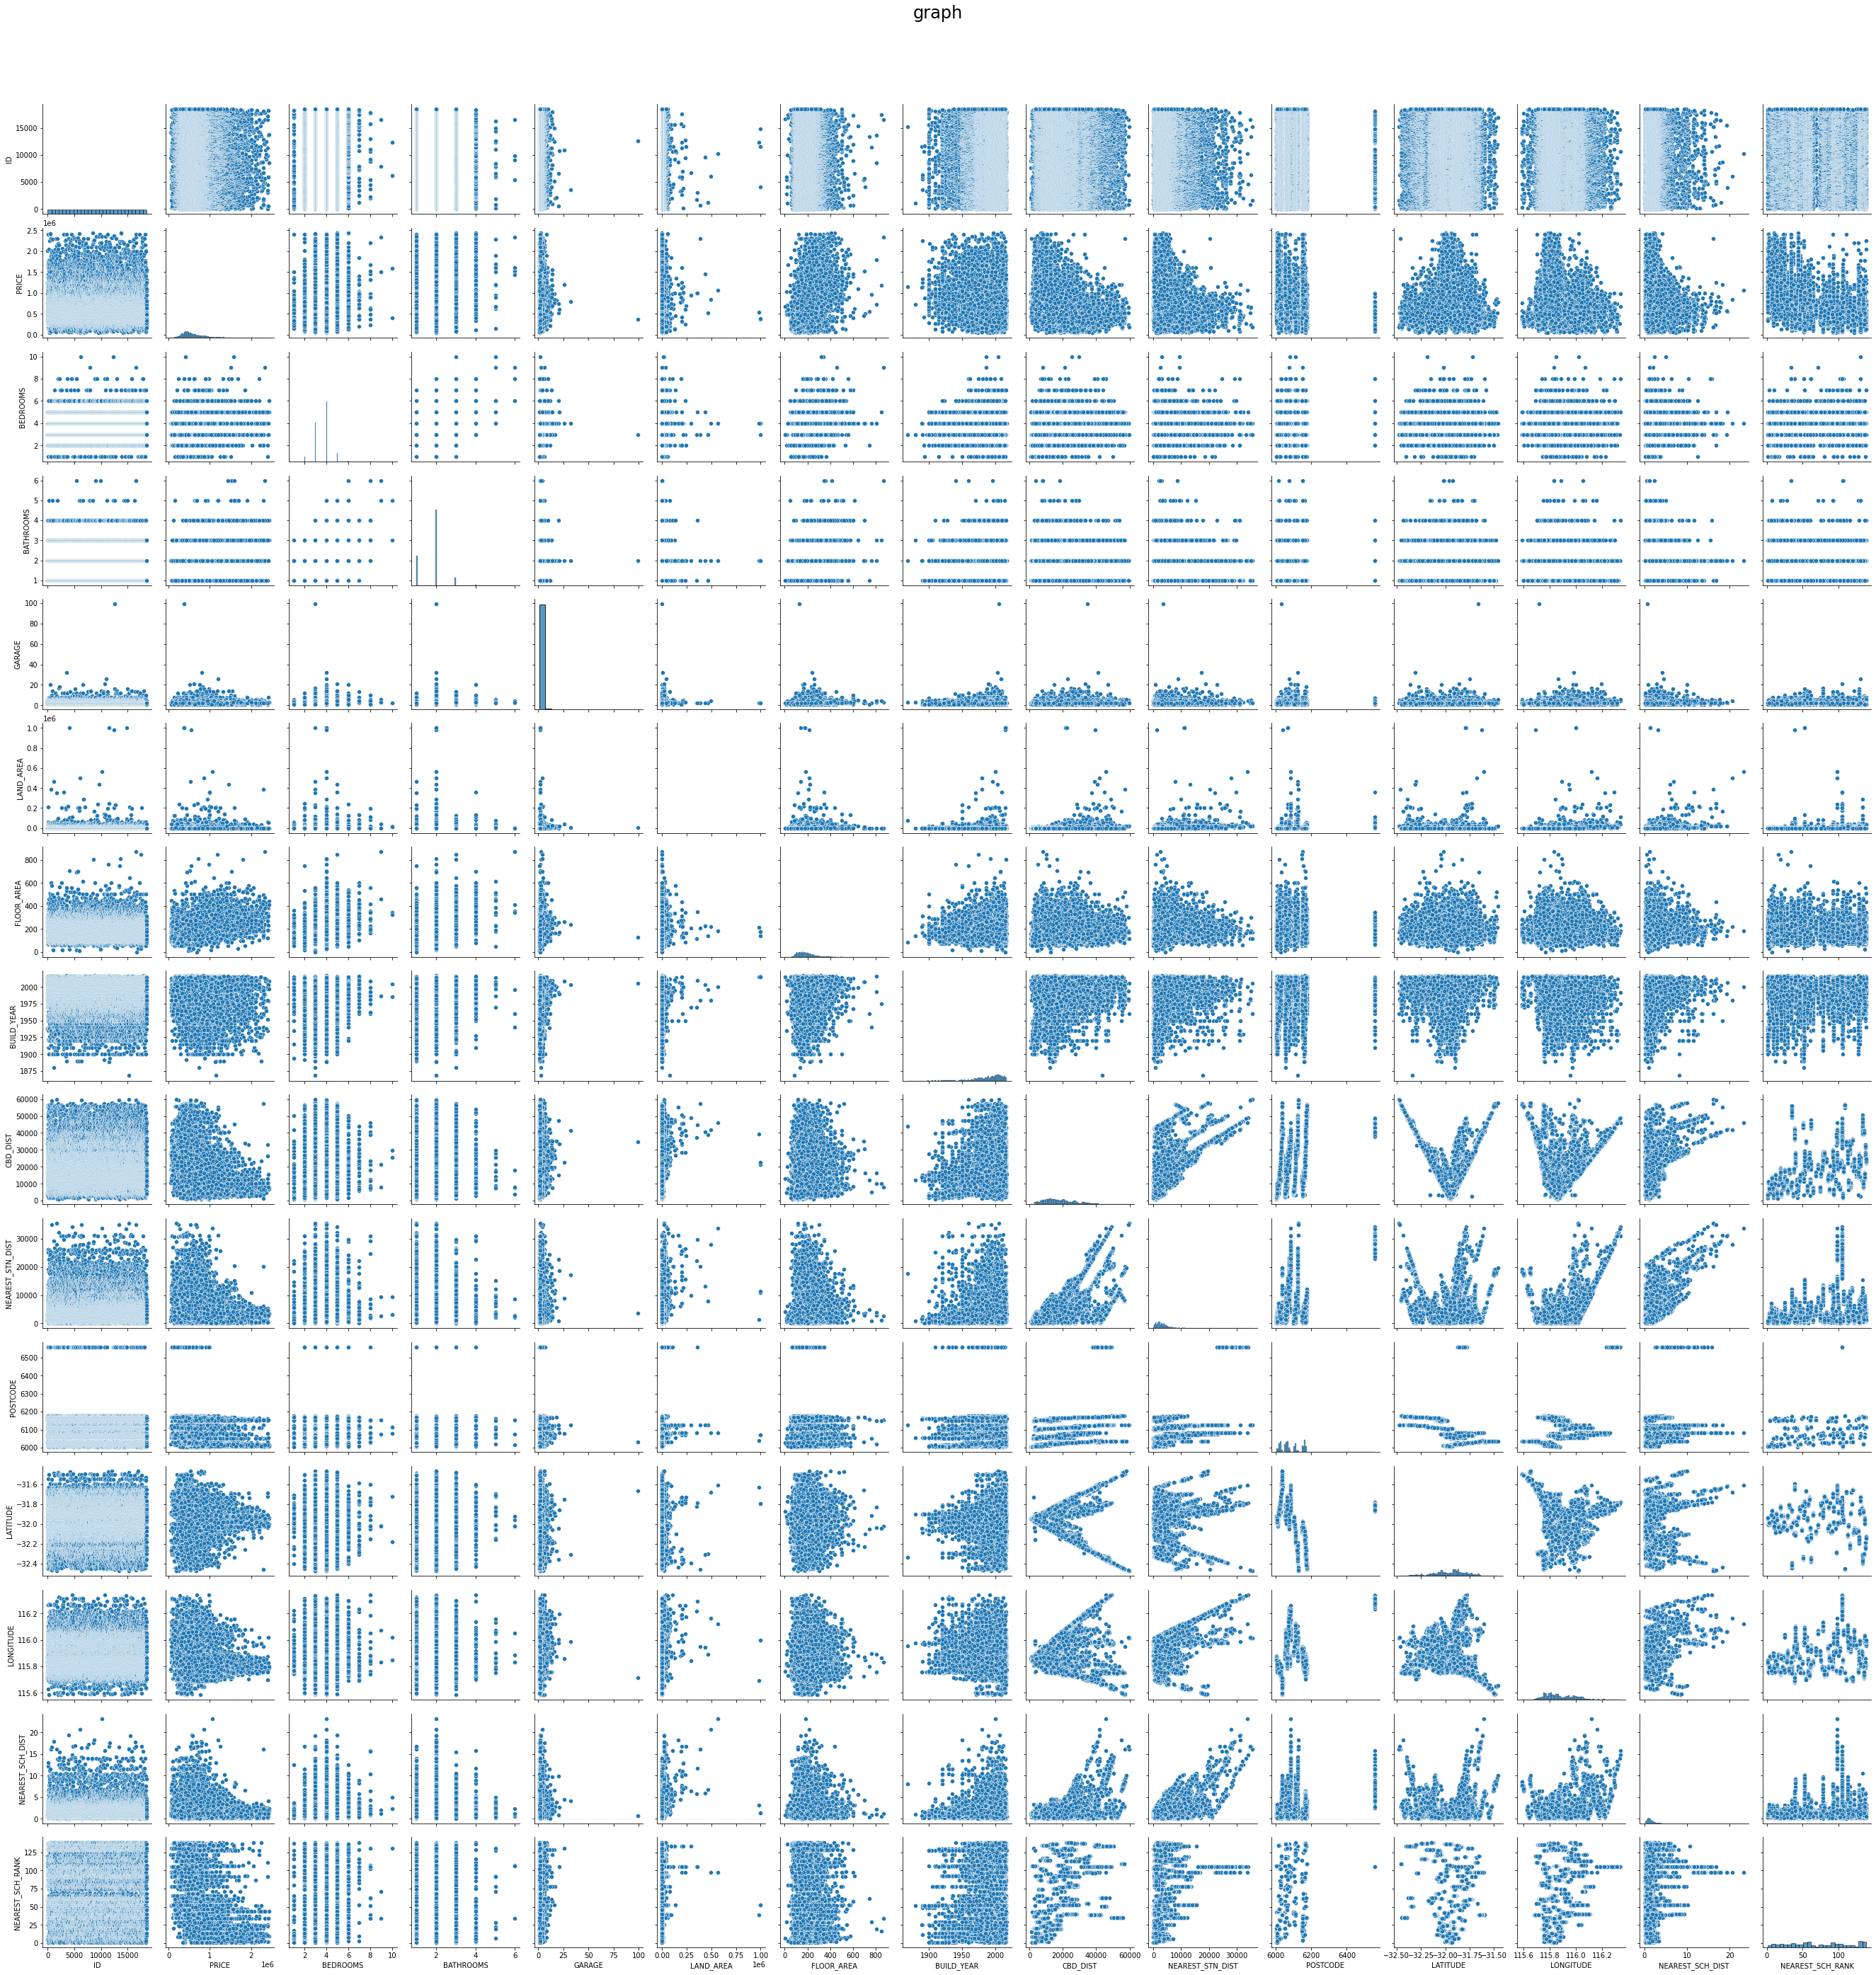

In [ ]:
sns_plot = sns.pairplot(train_df, palette= 'winter')
plt.suptitle("graph", y=1.04, size=24)
plt.show()

In [14]:
train_df['GARAGE'].fillna(0, inplace = True)

In [15]:
test_df['GARAGE'].fillna(0, inplace = True)

In [16]:
train_df[['SOLD_MONTH', 'SOLD_YEAR']] = train_df['DATE_SOLD'].str.split('-', 1, expand=True).astype('float64')
train_df.drop(['DATE_SOLD'],axis=1,inplace=True)

In [17]:
test_df[['SOLD_MONTH', 'SOLD_YEAR']] = test_df['DATE_SOLD'].str.split('-', 1, expand=True).astype('float64')
test_df.drop(['DATE_SOLD'],axis=1,inplace=True)

In [ ]:
# train_df['ROOM_PER_FLOOR'] = train_df['FLOOR_AREA'] / (train_df['BEDROOMS'] + train_df['BATHROOMS'] + train_df['GARAGE'])

In [ ]:
# test_df['ROOM_PER_FLOOR'] = test_df['FLOOR_AREA'] / (test_df['BEDROOMS'] + test_df['BATHROOMS'] + test_df['GARAGE'])

In [ ]:
# train_df['ROOM_PER_FLOOR']

In [15]:
train_df['PRESOLD'] = train_df['SOLD_YEAR'].astype('int') < train_df['BUILD_YEAR']

In [16]:
test_df['PRESOLD'] = test_df['SOLD_YEAR'].astype('int') < test_df['BUILD_YEAR']

In [ ]:
# train_df['NEAREST_SCH_DIST'][train_df['NEAREST_SCH_DIST'] > 10.5] = 10.5

In [ ]:
# test_df['NEAREST_SCH_DIST'][test_df['NEAREST_SCH_DIST'] > 10.5] = 10.5

In [ ]:
# train_df['SMLLAND'] = train_df['LAND_AREA'] < 1200

In [ ]:
# train_df['BIGLAND'] = train_df['LAND_AREA'] >= 1200

In [ ]:
# test_df['SMLLAND'] = test_df['LAND_AREA'] < 1200

In [ ]:
# test_df['BIGLAND'] = test_df['LAND_AREA'] >= 1200

In [ ]:
# train_df['Is_Midland Station'] = train_df['NEAREST_STN'] == 'Midland Station'

In [ ]:
# test_df['Is_Midland Station'] = test_df['NEAREST_STN'] == 'Midland Station'

In [17]:
train_df.drop(['ID', 'ADDRESS', 'SUBURB', 'SOLD_MONTH', 'NEAREST_SCH'], axis = 1, inplace = True)

In [ ]:
# train_df[train_df['LAND_AREA'] > 800000]

In [ ]:
# train_df.loc[4115,'LAND_AREA'] = 375 # m^2
# train_df.loc[14806,'LAND_AREA'] = 375
# train_df.loc[12373,'LAND_AREA'] = 574 
# train_df.loc[11523,'LAND_AREA'] = 375 # m^2

In [ ]:
# train_df.loc[4115]

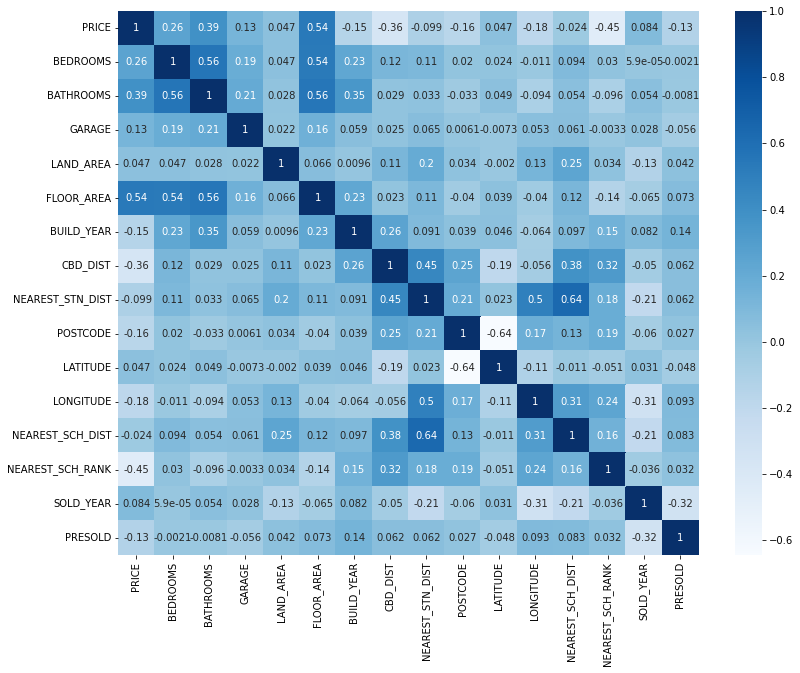

In [ ]:
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df.corr(),annot=True,cmap="Blues")

In [ ]:
# train_df['new_feature'] = train_df['POSTCODE'].div(train_df['LATITUDE'])

In [ ]:
# train_df['new_feature'] = train_df['NEAREST_STN_DIST'].div(test_df['NEAREST_SCH_DIST'])

In [18]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["PRICE"])>=0.01]
top_corr_features

Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'SOLD_YEAR'],
      dtype='object')

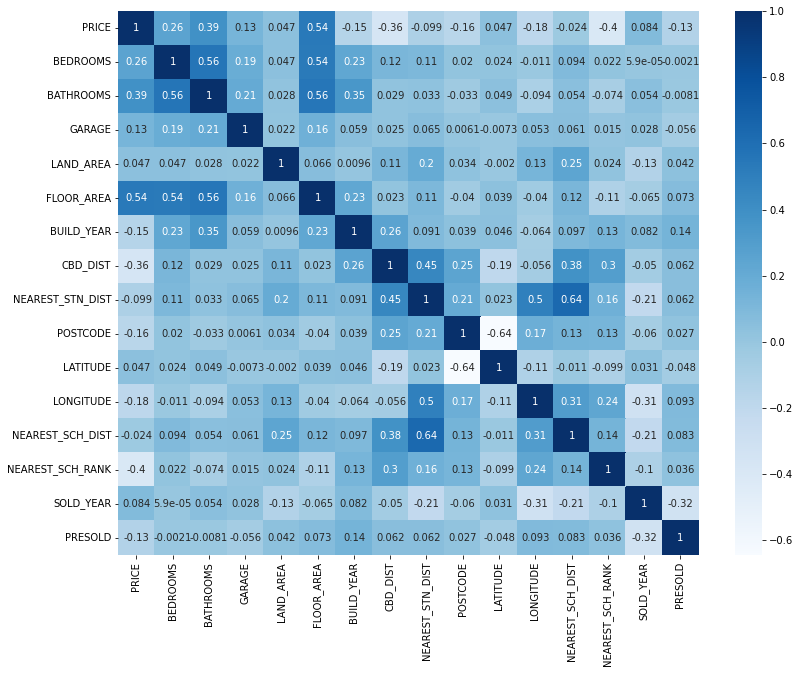

In [ ]:
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="Blues")

In [19]:
# feature selection
train_df = train_df[top_corr_features]
test_df = test_df[train_df.columns.drop(['PRICE'])]

In [18]:
test_df = test_df[train_df.columns.drop(['PRICE'])]

In [20]:
train_y_label = train_df['PRICE'] 	# target 값을 미리 분리하였음.
train_df.drop(['PRICE'], axis=1, inplace=True)

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(eta = 0.1, n_estimators = 650, colsample_bylevel = 0.7, colsample_bytree = 0.7, max_depth = 5, seed = 42)
model_xgb.fit(train_df, train_y_label)

[07:18:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bylevel=0.7, colsample_bytree=0.7, eta=0.1, max_depth=5,
             n_estimators=650, seed=42)

In [ ]:
importance = model_xgb.feature_importances_

In [ ]:
importances = pd.DataFrame()

In [ ]:
importances['feature'] = train_df.columns
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

feature  importances
0           POSTCODE     0.173039
1   NEAREST_SCH_RANK     0.159679
2            PRESOLD     0.155638
3          BATHROOMS     0.125390
4         FLOOR_AREA     0.094878
5           CBD_DIST     0.049572
6           BEDROOMS     0.049204
7          SOLD_YEAR     0.047727
8           LATITUDE     0.034243
9          LONGITUDE     0.033162
10         LAND_AREA     0.029669
11        BUILD_YEAR     0.018331
12  NEAREST_STN_DIST     0.011898
13  NEAREST_SCH_DIST     0.009024
14            GARAGE     0.008546

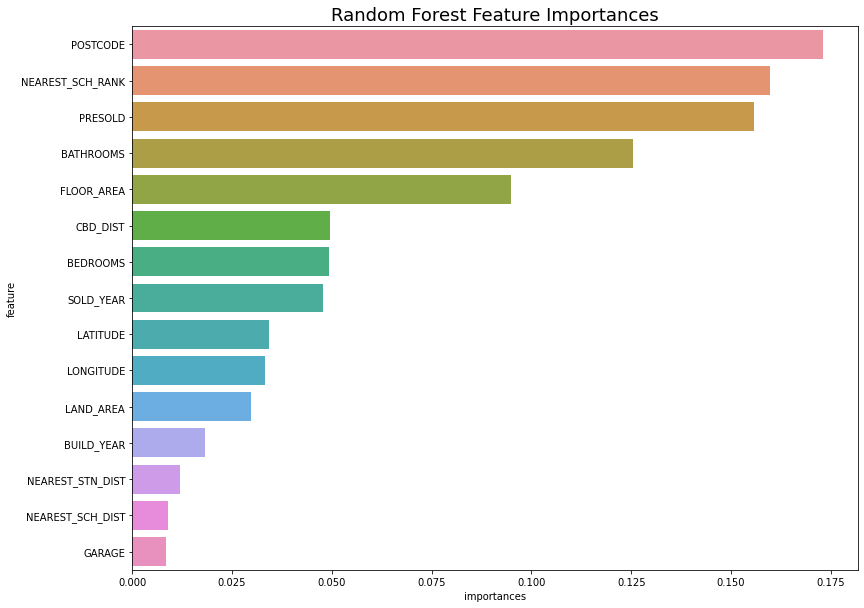

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot(x='importances', y='feature', data= importances)
plt.title('Random Forest Feature Importances', fontsize=18)
plt.show()

In [ ]:
# train_df = train_df.drop(['NEAREST_SCH_DIST'], axis = 1)
# test_df = test_df.drop(['NEAREST_SCH_DIST'], axis = 1)

In [ ]:
# train_df = train_df[train_df['POSTCODE'] < 6200]

In [21]:
boston_df = pd.concat((train_df, test_df), axis=0)
boston_df_index = boston_df.index

print('Length of Boston Dataset : ',len(boston_df))
boston_df.head()

Length of Boston Dataset :  33656


BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0         5          2     4.0        674         266      2007.0     35500   
1         5          4     2.0        540         301      2014.0     16900   
2         4          2     2.0        781         220      1992.0     33500   
3         2          1     2.0        425         185      1938.0      3500   
4         3          2     2.0        546         186      2004.0     12900   

   NEAREST_STN_DIST  POSTCODE   LATITUDE   LONGITUDE  NEAREST_SCH_DIST  \
0              3000      6030 -31.656206  115.720566          1.079230   
1              8100      6065 -31.800802  115.867675          0.667585   
2              3500      6030 -31.682040  115.702600          0.650761   
3              1500      6016 -31.926046  115.838181          0.484465   
4               800      6159 -32.032079  115.759626          1.869050   

   NEAREST_SCH_RANK  SOLD_YEAR  
0             120.0     2015.0  
1               NaN     2018.0  
2             111.0     2020.0  
3             106.0     2020.0  
4              25.0     2017.0

In [22]:
# check null 
check_null = boston_df.isna().sum() / len(boston_df)

# columns of null ratio >= 0.5
check_null[check_null >= 0.0]

BEDROOMS            0.000000
BATHROOMS           0.000000
GARAGE              0.000000
LAND_AREA           0.000000
FLOOR_AREA          0.000000
BUILD_YEAR          0.093743
CBD_DIST            0.000000
NEAREST_STN_DIST    0.000000
POSTCODE            0.000000
LATITUDE            0.000000
LONGITUDE           0.000000
NEAREST_SCH_DIST    0.000000
NEAREST_SCH_RANK    0.325410
SOLD_YEAR           0.000000
dtype: float64

In [23]:
remove_cols = check_null[check_null >= 0.5].keys()
boston_df = boston_df.drop(remove_cols, axis=1)

In [24]:
boston_df.head()

BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0         5          2     4.0        674         266      2007.0     35500   
1         5          4     2.0        540         301      2014.0     16900   
2         4          2     2.0        781         220      1992.0     33500   
3         2          1     2.0        425         185      1938.0      3500   
4         3          2     2.0        546         186      2004.0     12900   

   NEAREST_STN_DIST  POSTCODE   LATITUDE   LONGITUDE  NEAREST_SCH_DIST  \
0              3000      6030 -31.656206  115.720566          1.079230   
1              8100      6065 -31.800802  115.867675          0.667585   
2              3500      6030 -31.682040  115.702600          0.650761   
3              1500      6016 -31.926046  115.838181          0.484465   
4               800      6159 -32.032079  115.759626          1.869050   

   NEAREST_SCH_RANK  SOLD_YEAR  
0             120.0     2015.0  
1               NaN     2018.0  
2             111.0     2020.0  
3             106.0     2020.0  
4              25.0     2017.0

In [25]:
# split object & numeric
boston_obj_df = boston_df.select_dtypes(include='object')	# 카테고리형
boston_num_df = boston_df.select_dtypes(exclude='object')	# 수치형

In [26]:
print('Object type columns:\n',boston_obj_df.columns)
print('---------------------------------------------------------------------------------')
print('Numeric type columns:\n',boston_num_df.columns)

Object type columns:
 Index([], dtype='object')
---------------------------------------------------------------------------------
Numeric type columns:
 Index(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'SOLD_YEAR'],
      dtype='object')


In [ ]:
# boston_dummy_df = pd.get_dummies(boston_obj_df, drop_first=True)
# boston_dummy_df.index = boston_df_index
# boston_dummy_df.head()
# boston_dummy_df = pd.DataFrame()

# from sklearn.preprocessing import LabelEncoder
# for col in boston_obj_df.columns:
#     le = LabelEncoder()
#     le.fit(boston_obj_df[col])
#     boston_dummy_df[col] = le.transform(boston_obj_df[col])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
boston_dummy_df = ohe.fit_transform(boston_df[['NEAREST_STN']])
boston_dummy_df

KeyError: ignored

In [ ]:
boston_dummy_df = pd.DataFrame(boston_dummy_df, columns=['NEAREST_STN' + col for col in ohe.categories_[0]])

In [ ]:
boston_dummy_df

In [ ]:
loss_rank = set(df['NEAREST_SCH'][df['NEAREST_SCH_RANK'].isnull()])

In [ ]:
pd.DataFrame(loss_rank, columns = ['School_Name'])

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(boston_num_df)
boston_num_df_ = imputer.transform(boston_num_df)
boston_num_df = pd.DataFrame(boston_num_df_, columns=boston_num_df.columns, index=boston_df_index )
boston_num_df.head()

BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0       5.0        2.0     4.0      674.0       266.0      2007.0   35500.0   
1       5.0        4.0     2.0      540.0       301.0      2014.0   16900.0   
2       4.0        2.0     2.0      781.0       220.0      1992.0   33500.0   
3       2.0        1.0     2.0      425.0       185.0      1938.0    3500.0   
4       3.0        2.0     2.0      546.0       186.0      2004.0   12900.0   

   NEAREST_STN_DIST  POSTCODE   LATITUDE   LONGITUDE  NEAREST_SCH_DIST  \
0            3000.0    6030.0 -31.656206  115.720566          1.079230   
1            8100.0    6065.0 -31.800802  115.867675          0.667585   
2            3500.0    6030.0 -31.682040  115.702600          0.650761   
3            1500.0    6016.0 -31.926046  115.838181          0.484465   
4             800.0    6159.0 -32.032079  115.759626          1.869050   

   NEAREST_SCH_RANK  SOLD_YEAR  
0        120.000000     2015.0  
1         72.672569     2018.0  
2        111.000000     2020.0  
3        106.000000     2020.0  
4         25.000000     2017.0

In [32]:
boston_df = pd.concat([boston_obj_df, boston_num_df], axis = 1)
boston_df

NEAREST_STN  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  \
0               Butler Station       5.0        2.0     4.0      674.0   
1            Whitfords Station       5.0        4.0     2.0      540.0   
2             Clarkson Station       4.0        2.0     2.0      781.0   
3          Leederville Station       2.0        1.0     2.0      425.0   
4      North Fremantle Station       3.0        2.0     2.0      546.0   
...                        ...       ...        ...     ...        ...   
15141          Warwick Station       3.0        1.0     0.0      801.0   
15142         Thornlie Station       4.0        2.0     2.0      530.0   
15143          Warwick Station       3.0        2.0     2.0     1072.0   
15144          Midland Station       5.0        3.0     2.0    19996.0   
15145         Armadale Station       3.0        1.0     1.0     5823.0   

       FLOOR_AREA  BUILD_YEAR  CBD_DIST  NEAREST_STN_DIST  POSTCODE  ...  \
0           266.0      2007.0   35500.0            3000.0    6030.0  ...   
1           301.0      2014.0   16900.0            8100.0    6065.0  ...   
2           220.0      1992.0   33500.0            3500.0    6030.0  ...   
3           185.0      1938.0    3500.0            1500.0    6016.0  ...   
4           186.0      2004.0   12900.0             800.0    6159.0  ...   
...           ...         ...       ...               ...       ...  ...   
15141       108.0      1996.0   10800.0            3900.0    6061.0  ...   
15142       158.0      1998.0   13100.0             854.0    6147.0  ...   
15143       148.0      1950.0   14700.0            3800.0    6020.0  ...   
15144       396.0      1990.0   24900.0           10200.0    6071.0  ...   
15145       109.0      1990.0   27400.0             688.0    6112.0  ...   

       FLOOR_AREA3   BUILD_YEAR3     CBD_DIST3  NEAREST_STN_DIST3  \
0       18821096.0  8.084294e+09  4.473888e+13       2.700000e+10   
1       27270901.0  8.169179e+09  4.826809e+12       5.314410e+11   
2       10648000.0  7.904383e+09  3.759538e+13       4.287500e+10   
3        6331625.0  7.278826e+09  4.287500e+10       3.375000e+09   
4        6434856.0  8.048096e+09  2.146689e+12       5.120000e+08   
...            ...           ...           ...                ...   
15141    1259712.0  7.952096e+09  1.259712e+12       5.931900e+10   
15142    3944312.0  7.976024e+09  2.248091e+12       6.228359e+08   
15143    3241792.0  7.414875e+09  3.176523e+12       5.487200e+10   
15144   62099136.0  7.880599e+09  1.543825e+13       1.061208e+12   
15145    1295029.0  7.880599e+09  2.057082e+13       3.256607e+08   

          POSTCODE3     LATITUDE3    LONGITUDE3  NEAREST_SCH_DIST3  \
0      2.192562e+11 -31723.170852  1.549643e+06           1.257020   
1      2.230963e+11 -32159.866136  1.555560e+06           0.297522   
2      2.192562e+11 -31800.900197  1.548921e+06           0.275591   
3      2.177326e+11 -32541.336727  1.554373e+06           0.113707   
4      2.336311e+11 -32866.644403  1.551213e+06           6.529243   
...             ...           ...           ...                ...   
15141  2.226552e+11 -32333.099925  1.554219e+06           2.476244   
15142  2.322681e+11 -32889.185888  1.558946e+06           3.554737   
15143  2.181672e+11 -32318.426411  1.551108e+06           5.637822   
15144  2.237591e+11 -32397.478348  1.565245e+06          43.760149   
15145  2.283232e+11 -33256.785030  1.561634e+06           0.134721   

       NEAREST_SCH_RANK3    SOLD_YEAR3  
0           1.728000e+06  8.181353e+09  
1           3.838058e+05  8.217950e+09  
2           1.367631e+06  8.242408e+09  
3           1.191016e+06  8.242408e+09  
4           1.562500e+04  8.205739e+09  
...                  ...           ...  
15141       3.838058e+05  8.217950e+09  
15142       3.838058e+05  8.217950e+09  
15143       1.038230e+05  8.181353e+09  
15144       4.745520e+05  8.144866e+09  
15145       3.838058e+05  8.157016e+09  

[33656 rows x 44 columns]

In [ ]:
# feature selection
# boston_df = boston_df[top_corr_features]

In [36]:
boston_df = boston_num_df
boston_df.head()

BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0       5.0        2.0     4.0      674.0       266.0      2007.0   35500.0   
1       5.0        4.0     2.0      540.0       301.0      2014.0   16900.0   
2       4.0        2.0     2.0      781.0       220.0      1992.0   33500.0   
3       2.0        1.0     2.0      425.0       185.0      1938.0    3500.0   
4       3.0        2.0     2.0      546.0       186.0      2004.0   12900.0   

   NEAREST_STN_DIST  POSTCODE   LATITUDE  ...  FLOOR_AREA3   BUILD_YEAR3  \
0            3000.0    6030.0 -31.656206  ...   18821096.0  8.084294e+09   
1            8100.0    6065.0 -31.800802  ...   27270901.0  8.169179e+09   
2            3500.0    6030.0 -31.682040  ...   10648000.0  7.904383e+09   
3            1500.0    6016.0 -31.926046  ...    6331625.0  7.278826e+09   
4             800.0    6159.0 -32.032079  ...    6434856.0  8.048096e+09   

      CBD_DIST3  NEAREST_STN_DIST3     POSTCODE3     LATITUDE3    LONGITUDE3  \
0  4.473888e+13       2.700000e+10  2.192562e+11 -31723.170852  1.549643e+06   
1  4.826809e+12       5.314410e+11  2.230963e+11 -32159.866136  1.555560e+06   
2  3.759538e+13       4.287500e+10  2.192562e+11 -31800.900197  1.548921e+06   
3  4.287500e+10       3.375000e+09  2.177326e+11 -32541.336727  1.554373e+06   
4  2.146689e+12       5.120000e+08  2.336311e+11 -32866.644403  1.551213e+06   

   NEAREST_SCH_DIST3  NEAREST_SCH_RANK3    SOLD_YEAR3  
0           1.257020       1.728000e+06  8.181353e+09  
1           0.297522       3.838058e+05  8.217950e+09  
2           0.275591       1.367631e+06  8.242408e+09  
3           0.113707       1.191016e+06  8.242408e+09  
4           6.529243       1.562500e+04  8.205739e+09  

[5 rows x 43 columns]

In [29]:
boston_df['PRESOLD'] = boston_df['SOLD_YEAR'].astype('int') < boston_df['BUILD_YEAR']

In [30]:
square_df = boston_num_df ** 2

In [31]:
square_df.drop(['PRESOLD'], axis = 1, inplace = True)

In [32]:
square_df.columns = ['BEDROOMS2', 'BATHROOMS2', 'GARAGE2', 'LAND_AREA2', 'FLOOR_AREA2',
       'BUILD_YEAR2', 'CBD_DIST2', 'NEAREST_STN_DIST2', 'POSTCODE2', 'LATITUDE2',
       'LONGITUDE2', 'NEAREST_SCH_DIST2', 'NEAREST_SCH_RANK2', 'SOLD_YEAR2']

In [33]:
triple_df = boston_num_df ** 3
triple_df.drop(['PRESOLD'], axis = 1, inplace = True)

In [34]:
triple_df.columns = ['BEDROOMS3', 'BATHROOMS3', 'GARAGE3', 'LAND_AREA3', 'FLOOR_AREA3',
       'BUILD_YEAR3', 'CBD_DIST3', 'NEAREST_STN_DIST3', 'POSTCODE3', 'LATITUDE3',
       'LONGITUDE3', 'NEAREST_SCH_DIST3', 'NEAREST_SCH_RANK3', 'SOLD_YEAR3']

In [ ]:
# quadra_df = boston_num_df ** 4
# quadra_df.drop(['PRESOLD', 'SMLLAND', 'BIGLAND'], axis = 1, inplace = True)

In [ ]:
# quadra_df.columns = ['BEDROOMS4', 'BATHROOMS4', 'GARAGE4', 'LAND_AREA4', 'FLOOR_AREA4',
#        'BUILD_YEAR4', 'CBD_DIST4', 'NEAREST_STN_DIST4', 'POSTCODE4', 'LATITUDE4',
#        'LONGITUDE4', 'NEAREST_SCH_DIST4', 'NEAREST_SCH_RANK4', 'SOLD_YEAR4']

In [ ]:
# boston_df = pd.concat([boston_num_df, square_df], axis = 1)

In [35]:
boston_num_df = pd.concat([boston_num_df, square_df, triple_df], axis = 1)

In [ ]:
boston_df = pd.merge(boston_dummy_df, boston_num_df, right_index = True, left_index = True)

In [42]:
boston_df

NEAREST_STN  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  \
0               Butler Station       5.0        2.0     4.0      674.0   
1            Whitfords Station       5.0        4.0     2.0      540.0   
2             Clarkson Station       4.0        2.0     2.0      781.0   
3          Leederville Station       2.0        1.0     2.0      425.0   
4      North Fremantle Station       3.0        2.0     2.0      546.0   
...                        ...       ...        ...     ...        ...   
15141          Warwick Station       3.0        1.0     0.0      801.0   
15142         Thornlie Station       4.0        2.0     2.0      530.0   
15143          Warwick Station       3.0        2.0     2.0     1072.0   
15144          Midland Station       5.0        3.0     2.0    19996.0   
15145         Armadale Station       3.0        1.0     1.0     5823.0   

       FLOOR_AREA  BUILD_YEAR  CBD_DIST  NEAREST_STN_DIST  POSTCODE  ...  \
0           266.0      2007.0   35500.0            3000.0    6030.0  ...   
1           301.0      2014.0   16900.0            8100.0    6065.0  ...   
2           220.0      1992.0   33500.0            3500.0    6030.0  ...   
3           185.0      1938.0    3500.0            1500.0    6016.0  ...   
4           186.0      2004.0   12900.0             800.0    6159.0  ...   
...           ...         ...       ...               ...       ...  ...   
15141       108.0      1996.0   10800.0            3900.0    6061.0  ...   
15142       158.0      1998.0   13100.0             854.0    6147.0  ...   
15143       148.0      1950.0   14700.0            3800.0    6020.0  ...   
15144       396.0      1990.0   24900.0           10200.0    6071.0  ...   
15145       109.0      1990.0   27400.0             688.0    6112.0  ...   

       FLOOR_AREA3   BUILD_YEAR3     CBD_DIST3  NEAREST_STN_DIST3  \
0       18821096.0  8.084294e+09  4.473888e+13       2.700000e+10   
1       27270901.0  8.169179e+09  4.826809e+12       5.314410e+11   
2       10648000.0  7.904383e+09  3.759538e+13       4.287500e+10   
3        6331625.0  7.278826e+09  4.287500e+10       3.375000e+09   
4        6434856.0  8.048096e+09  2.146689e+12       5.120000e+08   
...            ...           ...           ...                ...   
15141    1259712.0  7.952096e+09  1.259712e+12       5.931900e+10   
15142    3944312.0  7.976024e+09  2.248091e+12       6.228359e+08   
15143    3241792.0  7.414875e+09  3.176523e+12       5.487200e+10   
15144   62099136.0  7.880599e+09  1.543825e+13       1.061208e+12   
15145    1295029.0  7.880599e+09  2.057082e+13       3.256607e+08   

          POSTCODE3     LATITUDE3    LONGITUDE3  NEAREST_SCH_DIST3  \
0      2.192562e+11 -31723.170852  1.549643e+06           1.257020   
1      2.230963e+11 -32159.866136  1.555560e+06           0.297522   
2      2.192562e+11 -31800.900197  1.548921e+06           0.275591   
3      2.177326e+11 -32541.336727  1.554373e+06           0.113707   
4      2.336311e+11 -32866.644403  1.551213e+06           6.529243   
...             ...           ...           ...                ...   
15141  2.226552e+11 -32333.099925  1.554219e+06           2.476244   
15142  2.322681e+11 -32889.185888  1.558946e+06           3.554737   
15143  2.181672e+11 -32318.426411  1.551108e+06           5.637822   
15144  2.237591e+11 -32397.478348  1.565245e+06          43.760149   
15145  2.283232e+11 -33256.785030  1.561634e+06           0.134721   

       NEAREST_SCH_RANK3    SOLD_YEAR3  
0              1728000.0  8.181353e+09  
1              8000000.0  8.217950e+09  
2              1367631.0  8.242408e+09  
3              1191016.0  8.242408e+09  
4                15625.0  8.205739e+09  
...                  ...           ...  
15141          8000000.0  8.217950e+09  
15142          8000000.0  8.217950e+09  
15143           103823.0  8.181353e+09  
15144           474552.0  8.144866e+09  
15145          8000000.0  8.157016e+09  

[33656 rows x 44 columns]

In [37]:
train_df = boston_df[:-len_test_df]
test_df = boston_df[-len_test_df:]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
train_dummy_df = ohe.fit_transform(train_df[['NEAREST_STN']])
train_dummy_df = pd.DataFrame(train_dummy_df, columns=['NEAREST_STN_' + col for col in ohe.categories_[0]])

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_df['NEAREST_STN'])
train_df['NEAREST_STN'] = le.transform(train_df['NEAREST_STN'])

# ohe = OneHotEncoder(sparse=False)
# # fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
# train_dummy_df = ohe.fit_transform(train_df[['NEAREST_STN']])
# train_dummy_df = pd.DataFrame(train_dummy_df, columns=['NEAREST_STN_' + col for col in ohe.categories_[0]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [37]:
test_df['NEAREST_STN'] = le.transform(test_df['NEAREST_STN'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
train_df['NEAREST_STN2'] = train_df['NEAREST_STN'] ** 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
train_df['NEAREST_STN3'] = train_df['NEAREST_STN'] ** 3
test_df['NEAREST_STN2'] = test_df['NEAREST_STN'] ** 2
test_df['NEAREST_STN3'] = test_df['NEAREST_STN'] ** 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [38]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()

# std_scaler.fit(train_df)
# train_df = std_scaler.transform(train_df)
# train_df = pd.DataFrame(train_df, columns = boston_df.columns)

# std_scaler.fit(test_df)
# test_df = std_scaler.transform(test_df)
# test_df = pd.DataFrame(test_df, columns = boston_df.columns)

train_df['PRICE'] = train_y_label

print('train set length: ',len(train_df))
print('test set length: ',len(test_df))


from sklearn.model_selection import train_test_split

X_train = train_df.drop(['PRICE'], axis=1)
y_train = train_df['PRICE']

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state = 42)

X_test = test_df

train set length:  18510
test set length:  15146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

# poly_features = PolynomialFeatures(degree=3, include_bias=True) # 기본 다항식형태를 만들고
# x_poly = poly_features.fit_transform(X_train)

In [44]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["PRICE"])>=0.01]
top_corr_features

Index(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'SOLD_YEAR',
       'PRESOLD', 'BEDROOMS2', 'BATHROOMS2', 'GARAGE2', 'FLOOR_AREA2',
       'BUILD_YEAR2', 'CBD_DIST2', 'NEAREST_STN_DIST2', 'POSTCODE2',
       'LATITUDE2', 'LONGITUDE2', 'NEAREST_SCH_DIST2', 'NEAREST_SCH_RANK2',
       'SOLD_YEAR2', 'BEDROOMS3', 'BATHROOMS3', 'FLOOR_AREA3', 'BUILD_YEAR3',
       'CBD_DIST3', 'NEAREST_STN_DIST3', 'POSTCODE3', 'LATITUDE3',
       'LONGITUDE3', 'NEAREST_SCH_DIST3', 'NEAREST_SCH_RANK3', 'SOLD_YEAR3',
       'PRICE'],
      dtype='object')

In [ ]:
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="Pastel1")

In [ ]:
# feature selection
train_df = train_df[top_corr_features]
test_df = test_df[train_df.columns.drop(['PRICE'])]

In [ ]:
train_y_label = train_df['PRICE'] 	# target 값을 미리 분리하였음.
train_df.drop(['PRICE'], axis=1, inplace=True)

In [ ]:
print('X_train : ',len(X_train))
# print('X_val : ',len(X_val))
print('X_test :',len(X_test))

X_train :  18510
X_test : 15146


In [39]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 78 kB/s 


In [40]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()
model.fit(X_train, y_train)

Learning rate set to 0.064928
0:	learn: 340022.7229284	total: 75.5ms	remaining: 1m 15s
1:	learn: 328109.3069954	total: 97.8ms	remaining: 48.8s
2:	learn: 316949.3392379	total: 115ms	remaining: 38.2s
3:	learn: 306626.2655677	total: 127ms	remaining: 31.5s
4:	learn: 297399.7535442	total: 138ms	remaining: 27.4s
5:	learn: 288719.6927412	total: 149ms	remaining: 24.6s
6:	learn: 280243.5492950	total: 160ms	remaining: 22.7s
7:	learn: 272880.4376870	total: 172ms	remaining: 21.3s
8:	learn: 265953.1994519	total: 183ms	remaining: 20.2s
9:	learn: 259682.4479380	total: 195ms	remaining: 19.3s
10:	learn: 253823.9091737	total: 206ms	remaining: 18.5s
11:	learn: 248402.0158794	total: 218ms	remaining: 17.9s
12:	learn: 243096.4922498	total: 229ms	remaining: 17.4s
13:	learn: 238480.0405988	total: 240ms	remaining: 16.9s
14:	learn: 234053.4773684	total: 252ms	remaining: 16.5s
15:	learn: 230130.6500719	total: 272ms	remaining: 16.7s
16:	learn: 226721.8684569	total: 291ms	remaining: 16.8s
17:	learn: 223169.1235664

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param = {
    'eta':[0.1, 0.2, 0.3],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor(max_depth = 5, seed = 42)
grid_search = GridSearchCV(estimator=model, param_grid=param, cv = 5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

In [ ]:
# X_train = boston_df

In [45]:
import xgboost as xgb

model = xgb.XGBRegressor(eta = 0.01, n_estimators = 650, colsample_bylevel = 0.7, colsample_bytree = 0.7, max_depth = 5, seed = 42)
model.fit(X_train, y_train)

[00:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bylevel=0.7, colsample_bytree=0.7, eta=0.01, max_depth=5,
             n_estimators=650, seed=42)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred_train = model.predict(X_train)
# pred_train = model.predict(x_poly)
# pred_val = model.predict(X_val)

print('train rmse score: ', mean_squared_error(y_train, pred_train)**0.5)
# print('val rmse score:', mean_squared_error(y_val, pred_val)**0.5)

train rmse score:  97875.87573015857


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred_train = grid_search.predict(X_train)
# pred_val = grid_search.predict(X_val)

print('train rmse score: ', mean_squared_error(y_train, pred_train)**0.5)
# print('val rmse score:', mean_squared_error(y_val, pred_val)**0.5)

In [42]:
test_y_pred = model.predict(X_test)
# test_y_pred = model.predict(X_test)
id_pred_df = pd.DataFrame()
id_pred_df['Id'] = test_id_idx
id_pred_df['PRICE'] = test_y_pred
id_pred_df.to_csv('PRESOLD_AFTER.csv', index=False)

In [43]:
id_pred_df

Id         PRICE
0      18510  5.134594e+05
1      18511  1.532974e+06
2      18512  1.075191e+06
3      18513  4.991201e+05
4      18514  2.332046e+05
...      ...           ...
15141  33651  3.406371e+05
15142  33652  4.559354e+05
15143  33653  1.081375e+06
15144  33654  1.049706e+06
15145  33655  3.810727e+05

[15146 rows x 2 columns]